### Libraries

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

### Loading dataset

In [2]:
# Load the Mall Customer Segmentation Dataset
customers_data = pd.read_csv('Mall_Customers.csv')

# Displaying first few rows of the dataset
customers_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Dataset analysis

In [3]:
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# Calculate statistical moments
moments = customers_data.describe().T
moments['mean'] = customers_data.mean()
moments['median'] = customers_data.median()
moments['std_dev'] = customers_data.std()
moments['skewness'] = customers_data.skew()
moments['kurtosis'] = customers_data.kurtosis()

# Calculate the correlation matrix
correlation_matrix = customers_data.corr()

# Print results
print("Statistical Moments:")
print(moments)
print("\nCorrelation Matrix:")
print(correlation_matrix)

Statistical Moments:
                        count    mean        std   min    25%    50%     75%  \
CustomerID              200.0  100.50  57.879185   1.0  50.75  100.5  150.25   
Age                     200.0   38.85  13.969007  18.0  28.75   36.0   49.00   
Annual Income (k$)      200.0   60.56  26.264721  15.0  41.50   61.5   78.00   
Spending Score (1-100)  200.0   50.20  25.823522   1.0  34.75   50.0   73.00   

                          max  median    std_dev  skewness  kurtosis  
CustomerID              200.0   100.5  57.879185  0.000000 -1.200000  
Age                      70.0    36.0  13.969007  0.485569 -0.671573  
Annual Income (k$)      137.0    61.5  26.264721  0.321843 -0.098487  
Spending Score (1-100)   99.0    50.0  25.823522 -0.047220 -0.826629  

Correlation Matrix:
                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398  

C:\Users\bonagiri\AppData\Local\Temp\ipykernel_8228\889190750.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  moments['mean'] = customers_data.mean()
C:\Users\bonagiri\AppData\Local\Temp\ipykernel_8228\889190750.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  moments['median'] = customers_data.median()
C:\Users\bonagiri\AppData\Local\Temp\ipykernel_8228\889190750.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  moments['std_dev'] = customers_data.std()
C:\Users\bonagiri\AppD

In [5]:
customers_data.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [6]:
customers_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Histogram 

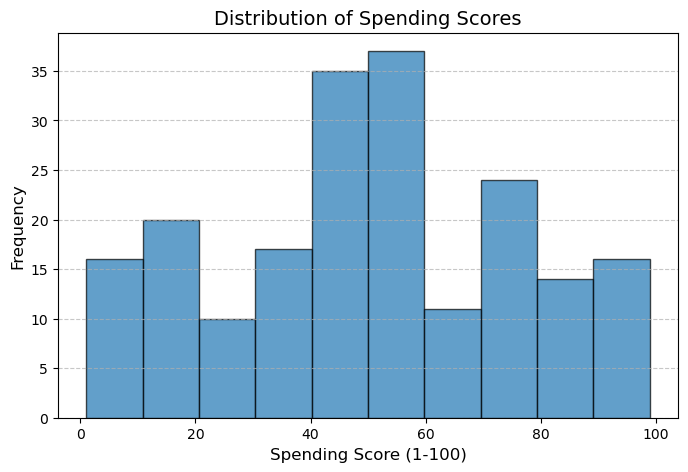

In [7]:
# Function to plot the histogram for Spending Score
def plot_histogram(customers_data):
    """
    Plot a histogram for Spending Score distribution.
    """
    plt.figure(figsize=(8, 5))
    plt.hist(customers_data['Spending Score (1-100)'], bins=10, edgecolor='black', alpha=0.7)
    plt.title("Distribution of Spending Scores", fontsize=14)
    plt.xlabel("Spending Score (1-100)", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_histogram(customers_data)

### Line plot

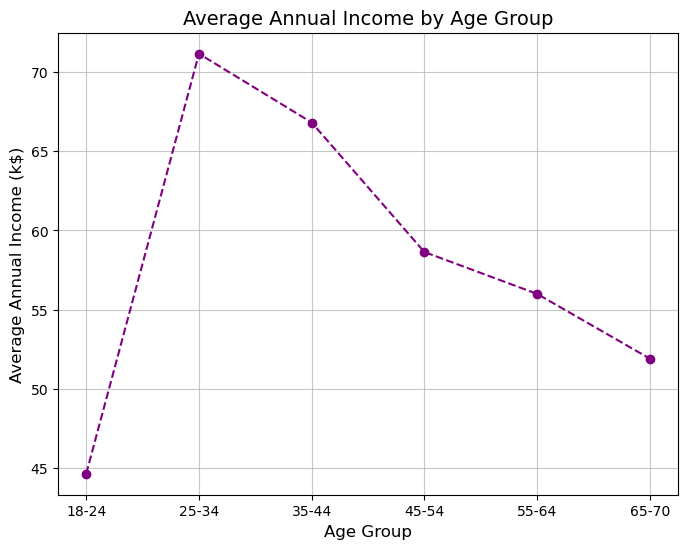

In [8]:
# Creating a revised line plot: Averaging Annual Income by Age groups
def plot_age_group_income(customers_data):
    """
    Plot average annual income by age group.
    """
    # Creating age groups
    bins = [18, 25, 35, 45, 55, 65, 70]
    labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-70']
    customers_data['Age Group'] = pd.cut(customers_data['Age'], bins=bins, labels=labels, right=False)

    # Calculating average annual income for each age group
    age_group_income = customers_data.groupby('Age Group')["Annual Income (k$)"].mean().reset_index()

    # Plotting the line graph
    plt.figure(figsize=(8, 6))
    plt.plot(age_group_income['Age Group'], age_group_income["Annual Income (k$)"], marker='o', linestyle='--', color="purple")
    plt.title("Average Annual Income by Age Group", fontsize=14)
    plt.xlabel("Age Group", fontsize=12)
    plt.ylabel("Average Annual Income (k$)", fontsize=12)
    plt.grid(alpha=0.7)
    plt.show()

# Executing the function
plot_age_group_income(customers_data)

### Heatmap

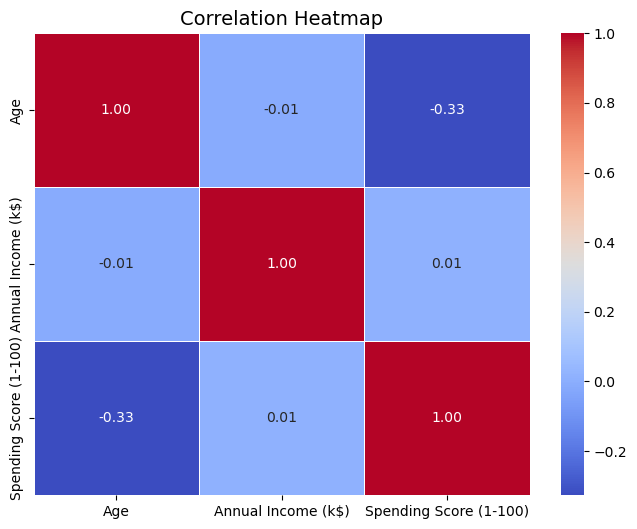

In [9]:
# Function to plot the heatmap for correlations
def plot_heatmap(customers_data):
    """
    Plot a heatmap for correlations among key variables.
    """
    plt.figure(figsize=(8, 6))
    correlation_matrix = customers_data[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Correlation Heatmap", fontsize=14)
    plt.show()
    
plot_heatmap(customers_data)

### K-means clustering

C:\Users\bonagiri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


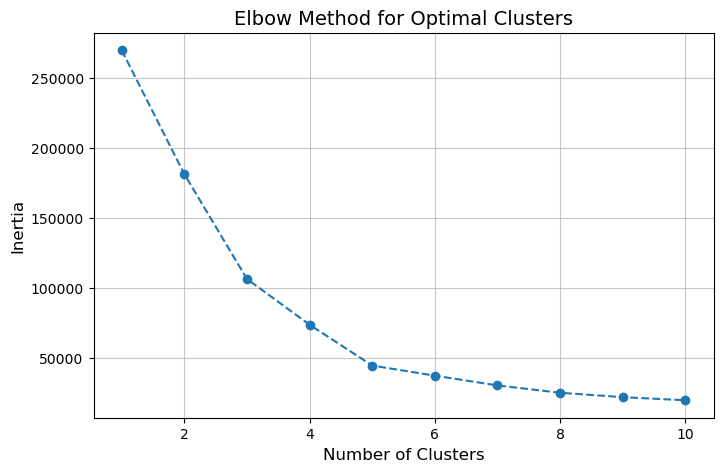

In [10]:
# Function to plot the elbow method
def plot_elbow(customers_data):
    inertia = []
    range_n_clusters = range(1, 11)
    for k in range_n_clusters:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(customers_data[["Annual Income (k$)", "Spending Score (1-100)"]])
        inertia.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 5))
    plt.plot(range_n_clusters, inertia, marker='o', linestyle='--')
    plt.title("Elbow Method for Optimal Clusters", fontsize=14)
    plt.xlabel("Number of Clusters", fontsize=12)
    plt.ylabel("Inertia", fontsize=12)
    plt.grid(alpha=0.7)
    plt.show()

plot_elbow(customers_data)

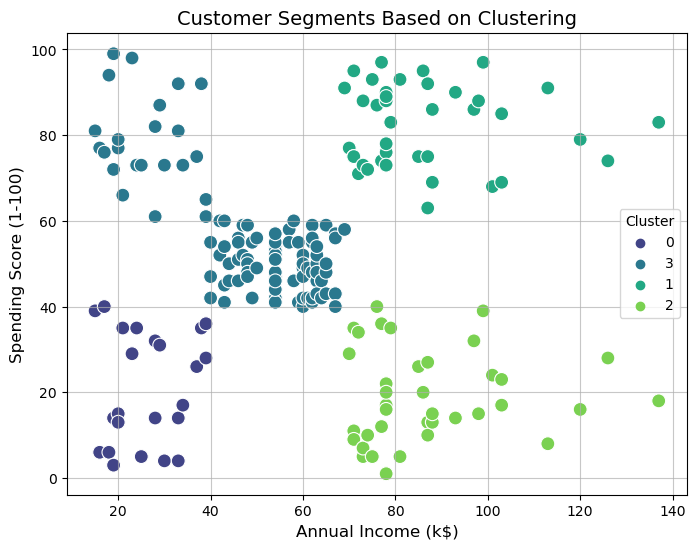

In [11]:
# Applying k-means clustering to ensure the "Cluster" column is present
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customers_data["Cluster"] = kmeans.fit_predict(customers_data[["Annual Income (k$)", "Spending Score (1-100)"]])

# Creation of the "Cluster" column
customers_data["Cluster"] = customers_data["Cluster"].astype(str)  

# Plotting the clusters
def plot_clusters_fixed(data):
    """
    Plot clusters formed by k-means clustering on a 2D scatter plot.

    Parameters:
    - data (pd.DataFrame): The dataset containing "Annual Income (k$)", "Spending Score (1-100)", and "Cluster" columns.
    """
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x="Annual Income (k$)", 
        y="Spending Score (1-100)", 
        hue="Cluster", 
        palette="viridis", 
        data=data,
        s=100
    )
    plt.title("Customer Segments Based on Clustering", fontsize=14)
    plt.xlabel("Annual Income (k$)", fontsize=12)
    plt.ylabel("Spending Score (1-100)", fontsize=12)
    plt.legend(title="Cluster")
    plt.grid(alpha=0.7)
    plt.show()

# Executing the updated function
plot_clusters_fixed(customers_data)

### Linear fitting

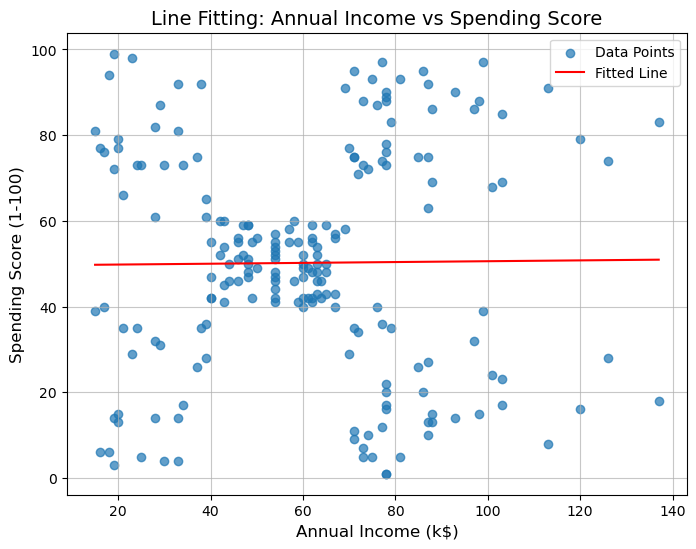

{'slope': 0.009736498275606825,
 'intercept': 49.61035766442925,
 'predicted_values': array([49.75640514, 49.75640514, 49.76614164, 49.76614164, 49.77587814,
        49.77587814, 49.78561463, 49.78561463, 49.79535113, 49.79535113,
        49.79535113, 49.79535113, 49.80508763, 49.80508763, 49.80508763,
        49.80508763, 49.81482413, 49.81482413, 49.83429712, 49.83429712,
        49.84403362, 49.84403362, 49.85377012, 49.85377012, 49.88297962,
        49.88297962, 49.88297962, 49.88297962, 49.89271611, 49.89271611,
        49.90245261, 49.90245261, 49.93166211, 49.93166211, 49.93166211,
        49.93166211, 49.94139861, 49.94139861, 49.9706081 , 49.9706081 ,
        49.9803446 , 49.9803446 , 49.9900811 , 49.9900811 , 49.9900811 ,
        49.9900811 , 49.9998176 , 49.9998176 , 49.9998176 , 49.9998176 ,
        50.01929059, 50.01929059, 50.02902709, 50.02902709, 50.02902709,
        50.02902709, 50.03876359, 50.03876359, 50.05823659, 50.05823659,
        50.05823659, 50.05823659, 50.06

In [12]:
# Apply linear fitting
def perform_linear_regression(data, x_column, y_column):
    """
    Perform linear regression on two specified columns in a dataset.
    
    Parameters:
    - x_column (str): The name of the independent variable (predictor).
    - y_column (str): The name of the dependent variable (response).

    Returns:
    - dict: A dictionary containing:
        - 'slope': Coefficient of the regression line.
        - 'intercept': Intercept of the regression line.
        - 'predicted_values': Predicted values for the dependent variable.
    """
    # Applying linear regression (line fitting) between Annual Income and Spending Score
    X = customers_data["Annual Income (k$)"].values.reshape(-1, 1)
    y = customers_data["Spending Score (1-100)"].values

    # Fitting the model
    linear_model = LinearRegression()
    linear_model.fit(X, y)

    # Generating predictions
    customers_data["Fitted Score"] = linear_model.predict(X)

    # Scatter plot with fitted line
    plt.figure(figsize=(8, 6))
    plt.scatter(customers_data["Annual Income (k$)"], customers_data["Spending Score (1-100)"], alpha=0.7, label="Data Points")
    plt.plot(customers_data["Annual Income (k$)"], customers_data["Fitted Score"], color="red", label="Fitted Line")
    plt.title("Line Fitting: Annual Income vs Spending Score", fontsize=14)
    plt.xlabel("Annual Income (k$)", fontsize=12)
    plt.ylabel("Spending Score (1-100)", fontsize=12)
    plt.legend()
    plt.grid(alpha=0.7)
    plt.show()

    # Displaying the regression line equation
    line_eq = f"Spending Score = {linear_model.coef_[0]:.2f} * Annual Income + {linear_model.intercept_:.2f}"
    line_eq
    
    # Generating predictions
    predicted_values = linear_model.predict(X)
    
    # Returning regression results
    return {
        "slope": linear_model.coef_[0],
        "intercept": linear_model.intercept_,
        "predicted_values": predicted_values
    }

# Example usage
results = perform_linear_regression(customers_data, "Annual Income (k$)", "Spending Score (1-100)")
results